# ANTIMONY and TELLURIUM

# Preliminaries

In [1]:
# Preliminaries
!pip install -q tellurium
import tellurium as te
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


# Antimony
Antimony is a computer language for describing reaction networks.
You input antimony states as python strings.

In [2]:
# Example of an Antimony model of a reversible reaction
model = """
species A, B, C
A -> B + C; k3*A
A -> B; k1*A
B -> A; k2*B

k1 = 1
k2 = 2
k3 = 0.5
A = 10
B = 0
"""

In [3]:
print(model)


species A, B, C
A -> B + C; k3*A
A -> B; k1*A
B -> A; k2*B

k1 = 1
k2 = 2
k3 = 0.5
A = 10
B = 0



In [4]:
# Example of an Antimony model of a reversible reaction and a fixed species
model2 = """
species A, B, C, D
$D -> B; $D*B
A -> B + C; k3*A
A -> B; k1*A
B -> A; k2*B

k1 = 1
k2 = 2
k3 = 0.5
D =10
A = 10
B = 0
"""

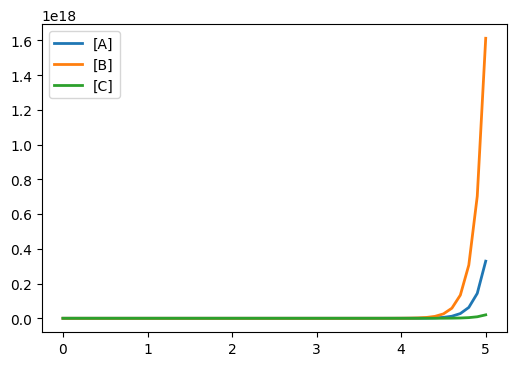

In [5]:
runner = te.loada(model2)
runner.simulate()
runner.plot()

# Tellurium
Tellurium is a python environment for executing models of reaction networks. Tellurium can run Antimony models.

In [6]:
runner = te.loada(model)
data = runner.simulate()

In [7]:
data

    time,     [A],     [B],      [C]
 [[    0,      10,       0,        0],
  [  0.1, 8.73437, 1.26563, 0.466518],
  [  0.2, 7.84249, 2.15751, 0.879643],
  [  0.3,   7.214,   2.786,  1.25514],
  [  0.4, 6.77111, 3.22889,  1.60413],
  [  0.5, 6.45902, 3.54098,  1.93443],
  [  0.6, 6.23909, 3.76091,  2.25156],
  [  0.7, 6.08411, 3.91589,  2.55941],
  [  0.8,  5.9749,  4.0251,  2.86073],
  [  0.9, 5.89794, 4.10206,  3.15744],
  [    1,  5.8437,  4.1563,   3.4509],
  [  1.1, 5.80549, 4.19451,  3.74207],
  [  1.2, 5.77856, 4.22144,  4.03163],
  [  1.3, 5.75958, 4.24042,  4.32006],
  [  1.4,  5.7462,  4.2538,  4.60768],
  [  1.5, 5.73678, 4.26322,  4.89475],
  [  1.6, 5.73014, 4.26986,  5.18141],
  [  1.7, 5.72546, 4.27454,  5.46779],
  [  1.8, 5.72216, 4.27784,  5.75398],
  [  1.9, 5.71983, 4.28017,  6.04002],
  [    2,  5.7182,  4.2818,  6.32597],
  [  2.1, 5.71704, 4.28296,  6.61185],
  [  2.2, 5.71623, 4.28377,  6.89768],
  [  2.3, 5.71566, 4.28434,  7.18348],
  [  2.4, 5.71525, 4.28475,

# Numpy Arrays and linear algebra

* Create arrays
* Shaping arrays
* Indexing and slicing
* ``linspace``
* Array arithmetic
* Inverse of a matrix
* Eigenvalues, eigenvectors
* Singular value decomposition

In [8]:
type(data)

roadrunner._roadrunner.NamedArray

In [9]:
data.size

204

In [10]:
?data.size

Type:        int
String form: 204
Docstring:  
int([x]) -> integer
int(x, base=10) -> integer

Convert a number or string to an integer, or return 0 if no arguments
are given.  If x is a number, return x.__int__().  For floating point
numbers, this truncates towards zero.

If x is not a number or if base is given, then x must be a string,
bytes, or bytearray instance representing an integer literal in the
given base.  The literal can be preceded by '+' or '-' and be surrounded
by whitespace.  The base defaults to 10.  Valid bases are 0 and 2-36.
Base 0 means to interpret the base from the string as an integer literal.
>>> int('0b100', base=0)
4


In [11]:
# Extract values of [A]
data[:,1]

[10.          8.73437359  7.84249415  7.21399977  6.77110552  6.45901735
  6.23909039  6.08411092  5.97489796  5.89793676  5.84370446  5.80548892
  5.77855699  5.75957786  5.74620351  5.73677827  5.73013634  5.72545573
  5.72215766  5.71983466  5.71819796  5.71704389  5.71622974  5.71565595
  5.71525174  5.71496675  5.71476571  5.7146242   5.71452483  5.71445507
  5.71440638  5.71437154  5.71434661  5.71432874  5.71431602  5.71430728
  5.71430226  5.71429966  5.71429705  5.7142966   5.71429554  5.71429372
  5.71429196  5.71429005  5.71428806  5.71428682  5.71428601  5.7142857
  5.71428583  5.71428626  5.71428641]

In [12]:
data[:,0]

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5. ]

In [13]:
# Last row
data[-1,:]
# Last row except for "time"
data[-1, 1:]

[ 5.71428641  4.28571359 14.8979585 ]

In [14]:
# Arithmetic with arrays
data[:, 0] + 1

[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7
 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5
 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6. ]

In [15]:
# Calculations on arrays
data[:, 1] + data[:, 2]**2

[10.         10.3361838  12.49732563 14.97579704 17.19686506 18.9975755
 20.38353146 21.41829824 22.17634441 22.72485959 23.11849709 23.39941213
 23.59913807 23.74075782 23.84098809 23.9118378  23.96187203 23.99718442
 24.02209276 24.03965    24.05202668 24.06075696 24.06691736 24.0712599
 24.07431941 24.07647673 24.07799863 24.07906994 24.07982229 24.08035041
 24.08071909 24.08098281 24.08117159 24.0813069  24.0814032  24.08146933
 24.08150739 24.08152707 24.08154679 24.08155023 24.08155829 24.08157206
 24.08158538 24.0815998  24.08161486 24.08162432 24.08163039 24.08163279
 24.08163174 24.08162852 24.08162736]

In [16]:
# Creating synthetic data
# Find the shape of the random variables to create
np.shape(data)
noise = np.random.rand(51, 3)
# Add noise to data
noise_data = data[:, 1:] + noise
noise_data

 [[ 10.7832, 0.38972, 0.933132],
  [ 9.36613, 2.08427,  1.10046],
  [ 8.28605, 2.72958, 0.921847],
  [ 7.27273, 3.28882,  1.40929],
  [ 7.59758, 4.17497,   1.8921],
  [  7.0228, 3.77152,   2.8344],
  [ 6.31658, 4.30938,  2.96245],
  [   6.237, 4.71724,  3.37271],
  [ 6.04743, 4.62193,  3.61217],
  [ 6.45645, 4.98957,  3.39336],
  [ 6.38292,  4.5768,  4.25193],
  [ 6.77724, 4.81263,  4.41637],
  [ 6.00642, 4.70381,  4.71685],
  [ 6.27123, 5.02815,  5.03479],
  [ 6.71419, 4.51671,  4.92992],
  [ 6.39749, 5.23752,  5.02748],
  [  6.2354, 4.70051,  5.52928],
  [ 6.12131, 5.12418,  5.78912],
  [ 6.63345, 4.49578,  6.47805],
  [ 6.56349, 4.61732,  6.42412],
  [ 6.56828, 5.01292,   7.1728],
  [ 5.90951, 5.18677,  7.30657],
  [ 6.52121, 4.81608,  7.40311],
  [ 6.68573, 4.72444,   7.1934],
  [ 6.31919, 4.54029,  8.13358],
  [ 6.43007, 4.99622,  8.29493],
  [ 6.16101, 4.41458,   8.4707],
  [ 5.80142, 4.37455,  8.92159],
  [  5.8641, 4.59888,  9.56533],
  [ 6.56536, 4.69969,  9.31555],
  [ 5.7428

In [17]:
# Calculate the sum of squared differences between data and noise_data
ssd = np.sum((data[:, 1:] - 0.1*noise_data)**2)
ssd

5325.525779541136

In [18]:
mult = 10
noise_data = data[:, 1:] + mult*noise
ssd = np.sum((data[:, 1:] - noise_data)**2)
ssd

5788.072559881857

# Pandas Series and DataFrames

In [19]:
data_df = pd.DataFrame(data, columns=["time", "A", "B", "C"])
data_df

,time,A,B,C
0,0.0,10.000000,0.000000,0.000000
1,0.1,8.734374,1.265626,0.466518
2,0.2,7.842494,2.157506,0.879643
3,0.3,7.214000,2.786000,1.255142
4,0.4,6.771106,3.228894,1.604127
5,0.5,6.459017,3.540983,1.934425
6,0.6,6.239090,3.760910,2.251558
7,0.7,6.084111,3.915889,2.559412
8,0.8,5.974898,4.025102,2.860728
9,0.9,5.897937,4.102063,3.157437


In [20]:
data_df[["A", "C"]]

,A,C
0,10.000000,0.000000
1,8.734374,0.466518
2,7.842494,0.879643
3,7.214000,1.255142
4,6.771106,1.604127
5,6.459017,1.934425
6,6.239090,2.251558
7,6.084111,2.559412
8,5.974898,2.860728
9,5.897937,3.157437


<AxesSubplot: >

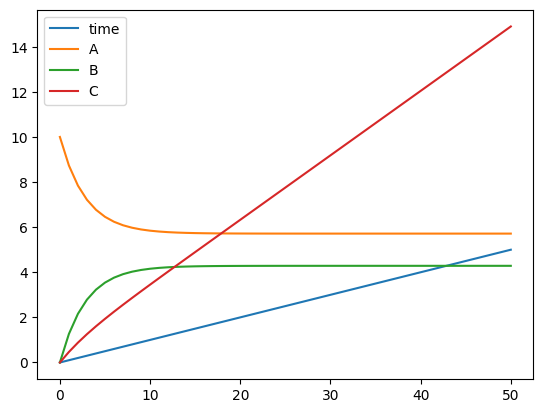

In [21]:
data_df.plot()

<AxesSubplot: xlabel='time'>

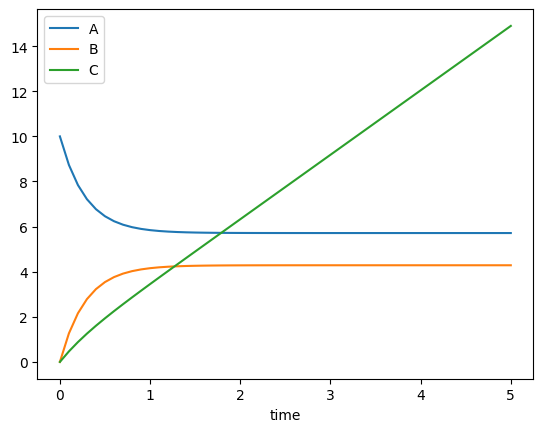

In [22]:
data1_df = data_df.copy()
data1_df.index = data1_df["time"]
del data1_df["time"]
data1_df.plot()

# Running simulations from BioModels
The [BioModels](https://www.ebi.ac.uk/biomodels/) repository contains simulations used in many published papers.

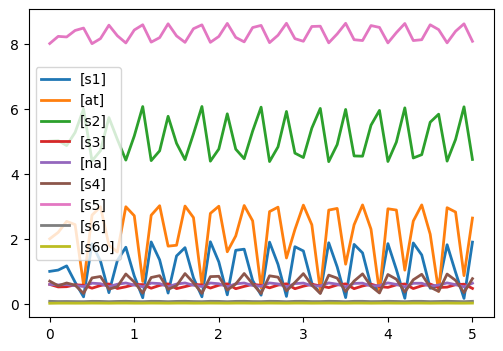

In [23]:
# Glycolytic oscillations - BioModels 206
url = "https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000206.2?filename=BIOMD0000000206_url.xml"
runner = te.loadSBMLModel(url)
data = runner.simulate()
runner.plot()

In [24]:
# Viewing the antimony model
print(runner.getAntimony())

// Created by libAntimony v2.13.2
model *Wolf2000_Glycolytic_Oscillations()

  // Compartments and Species:
  compartment compartment_;
  species s1 in compartment_, at_ in compartment_, s2 in compartment_, s3 in compartment_;
  species na in compartment_, s4 in compartment_, s5 in compartment_, s6 in compartment_;
  species s6o in compartment_;

  // Reactions:
  v1: s1 + 2 at_ -> s2; compartment_*k1*s1*at_/(1 + (at_/ki)^n);
  v2: s2 -> 2 s3; compartment_*k2*s2;
  v3: s3 + na -> s4 + at_; compartment_*((k31*k32*s3*na*(atot - at_) - k33*k34*s4*at_*(ntot - na))/(k33*(ntot - na) + k32*(atot - at_)));
  v4: s4 -> s5 + at_; compartment_*k4*s4*(atot - at_);
  v5: s5 -> s6; compartment_*k5*s5;
  v7: at_ -> ; compartment_*k7*at_;
  v8: s3 -> na; compartment_*k8*s3*(ntot - na);
  v9: s6o -> ; compartment_*k9*s6o;
  v10: s6 -> 0.1 s6o; compartment_*k10*(s6 - s6o);
  v6: s6 -> na; compartment_*k6*s6*(ntot - na);
  v0:  -> s1; compartment_*k0;

  // Species initializations:
  s1 = 1;
  at_ = 2;
 

Comparing the simulation output with the model curation.